# Diabetes Prediction

## Business Understanding

Building machine learning models for predictive analytics

## Data Understanding

In this project the dataset used is [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set). The dataset consists of 768 data records with 9 features. Following are the details of the dataset:


The following is a table containing details of the Diabetes Dataset dataset:


| Feature                    | Description                                                            |
|----------------------------|------------------------------------------------------------------------|
| Pregnancies                | Number of times pregnant                                               |
| Glucose                    | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BloodPressure              | Diastolic blood pressure (mm Hg)                                       |
| SkinThickness              | Triceps skin fold thickness (mm)                                       |
| Insulin                    | 2-Hour serum insulin (mu U/ml)                                         |
| BMI                        | Body mass index (weight in kg/(height in m)^2)                         |
| DiabetesPedigreeFunction   | Diabetes pedigree function                                             |
| Age                        | Age in years                                                           |
| Outcome                    | Class variable (0 or 1)                                                |

### Gathering Data

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# loading dataset using read_csv
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Assesing and Data Cleaning

Data Assessing is the process of identifying and understanding existing data, including exploring the structure, quality and usefulness of the data. This involves identifying problems such as missing, duplicate, or invalid data, as well as evaluating the suitability of the data for analytical purposes or other uses.

Data Cleaning is the process of addressing problems discovered during data assessment, such as filling in missing values, removing duplicates, or correcting incorrect formatting. The goal is to ensure the data is clean, consistent, and ready to be used in further analysis or modeling.

In [3]:
# Returns the number of rows and columns of the DataFrame
df.shape

(768, 9)

In [4]:
# Displays information about the DataFrame, including the number of non-null values, data type, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Counts the number of missing values ​​(NaN) in each DataFrame column
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Counts the number of rows that are duplicates in a DataFrame
df.duplicated().sum()

0

In [7]:
# Displays summary statistics of the DataFrame
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Based on the data assessing and data cleaning processes that have been carried out, in the dataset used there are no missing values ​​or duplicated data. Then, by using the *info()* function, we can identify the features contained in the dataset, which include Pregnancies, Glucose, Blood Pressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome. Apart from that, using the *describe()* function can provide a statistical summary of the dataset used, such as mean, standard deviation, min max value, and so on.

## Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is the process of initial investigation into data to analyze characteristics, find patterns, anomalies, and check assumptions in the data. This technique usually uses statistical assistance and graphical representation or visualization.

In the code below we find out how the number of people with diabetes and non-diabetes compares.

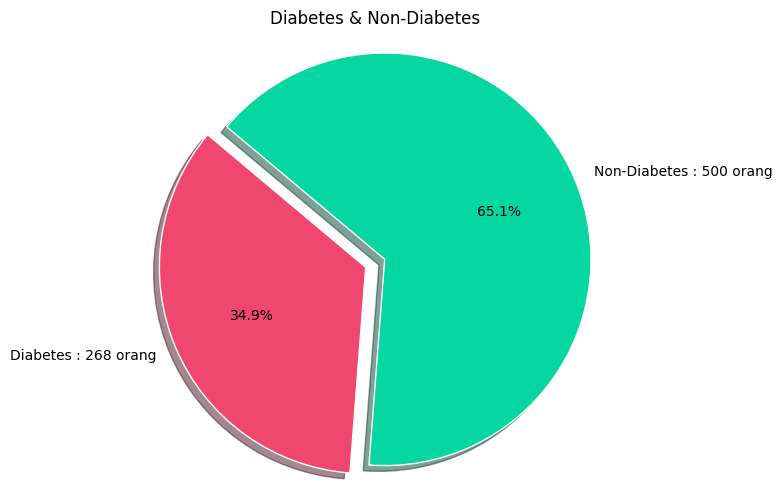

In [8]:
import matplotlib.pyplot as plt

# Pisahkan data berdasarkan nilai Outcome
diabetes = df[df['Outcome'] == 1]
non_diabetes = df[df['Outcome'] == 0]

# Hitung jumlah data untuk masing-masing kelompok
num_diabetes = len(diabetes)
num_non_diabetes = len(non_diabetes)

# Buat pie chart
labels = f'Diabetes : {num_diabetes} orang', f'Non-Diabetes : {num_non_diabetes} orang'
sizes = [num_diabetes, num_non_diabetes]
colors = ['#EF476F', '#06D6A0']  # Gunakan warna hijau (#06D6A0) dan merah (#EF476F)
explode = (0.1, 0)  # Pisahkan potongan "Diabetes"

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops={'edgecolor': 'white'})
plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran
plt.title('Diabetes & Non-Diabetes')
plt.show()

Creates a histogram for each numeric column in the DataFrame

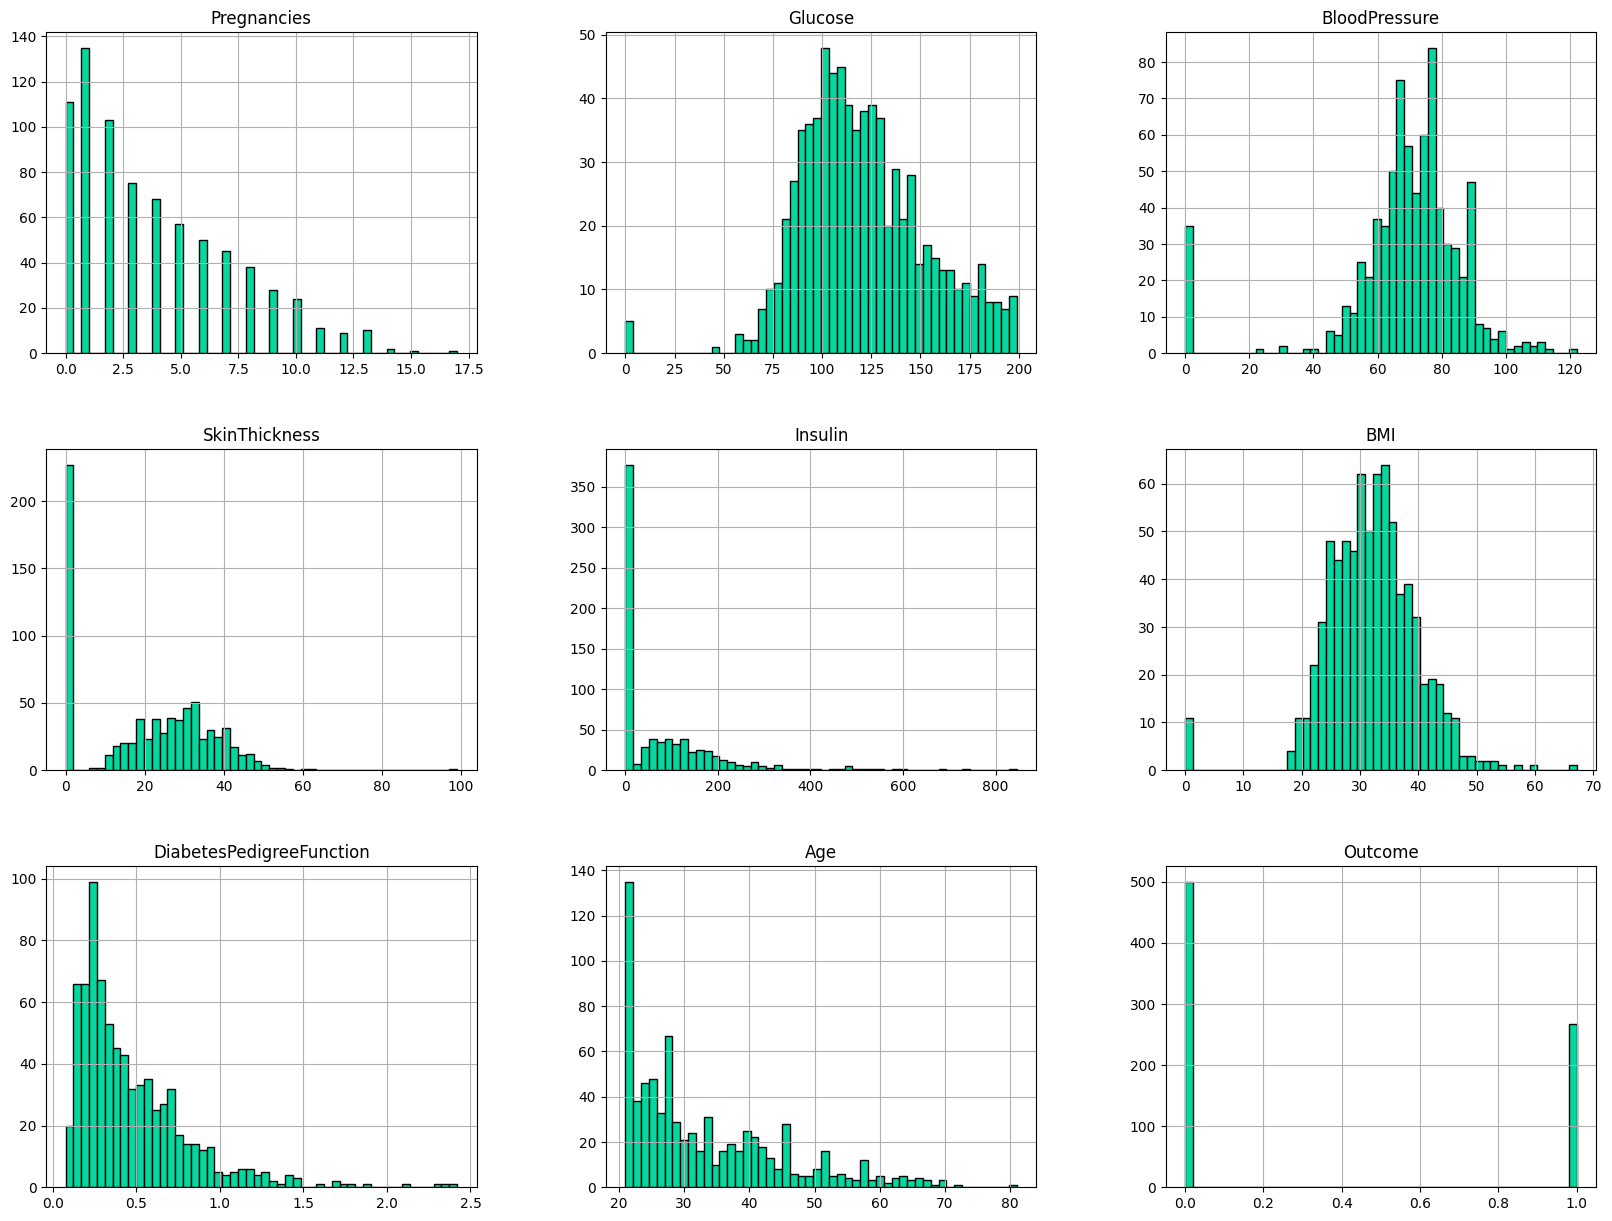

In [9]:
df.hist(bins=50, figsize=(20, 15), color='#06D6A0', edgecolor='black')
plt.show()

The code below aims to calculate the correlation between the numeric columns in the df DataFrame and then sort them based on the correlation with the 'Outcome' column.

If the correlation coefficient is close to +1, it indicates a positive relationship between two variables. This means that when one variable rises, it is likely that other variables also rise. Conversely, if the correlation coefficient is close to -1, it indicates a negative relationship between two variables. This means that when one variable rises, the other variable tends to fall.

If the correlation coefficient is close to 0, it indicates there is no linear relationship between two variables. However, it is important to remember that the absence of a linear correlation does not mean there is no relationship at all; it just means that the relationship cannot be explained in the same way as in a positive or negative correlation.

In [10]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [11]:
df.shape

(768, 9)

In this project we will detect outliers using boxplot data visualization techniques. Then, these outliers will be handled using the IQR (Inter Quartile Range) method.

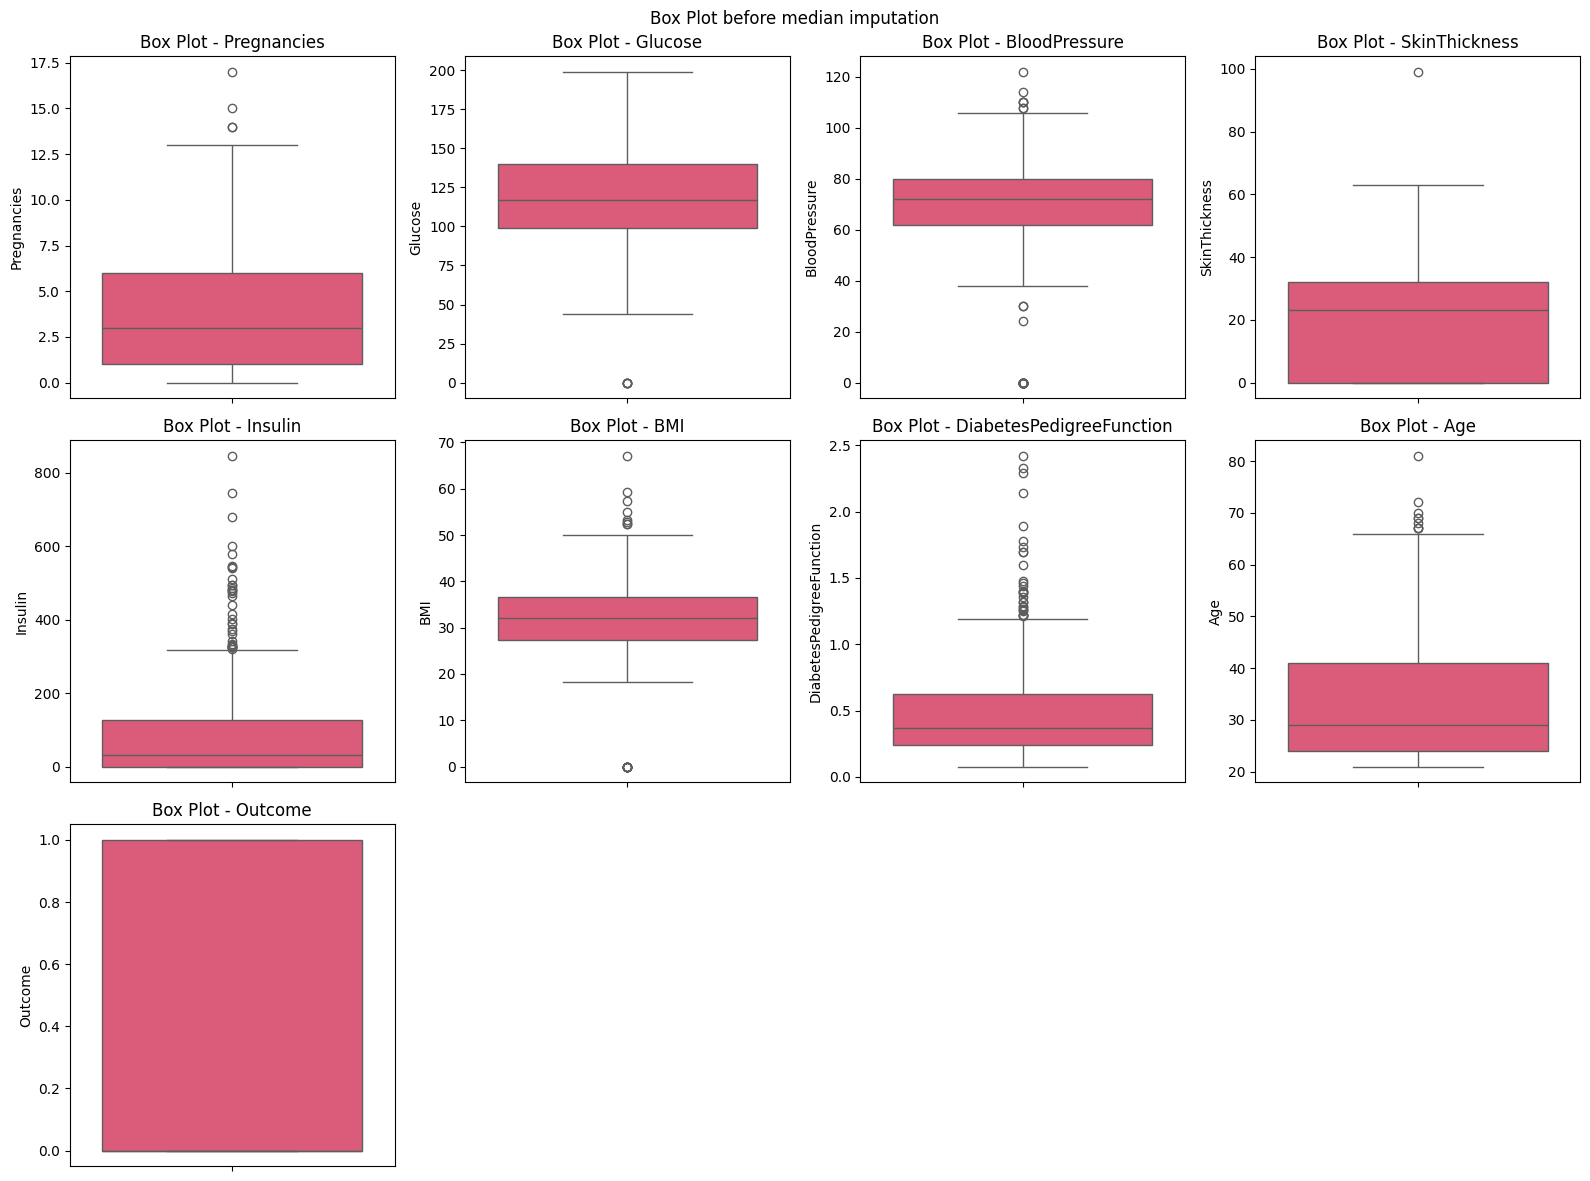

In [12]:
def box_plots_all_columns(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    plt.suptitle("Box Plot before median imputation")

    for i, column in enumerate(df.columns):
        row = i // 4
        col = i % 4
        sns.boxplot(df[column], ax=axes[row, col], color='#EF476F')
        axes[row, col].set_title(f"Box Plot - {column}")

    for i in range(num_cols, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

box_plots_all_columns(df)

It can be seen from the data visualization above that there are outliers in the dataset used. So it is necessary to handle outlier data.


IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers.

* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

(639, 9)

Displays data visualization results after applying the IQR technique.

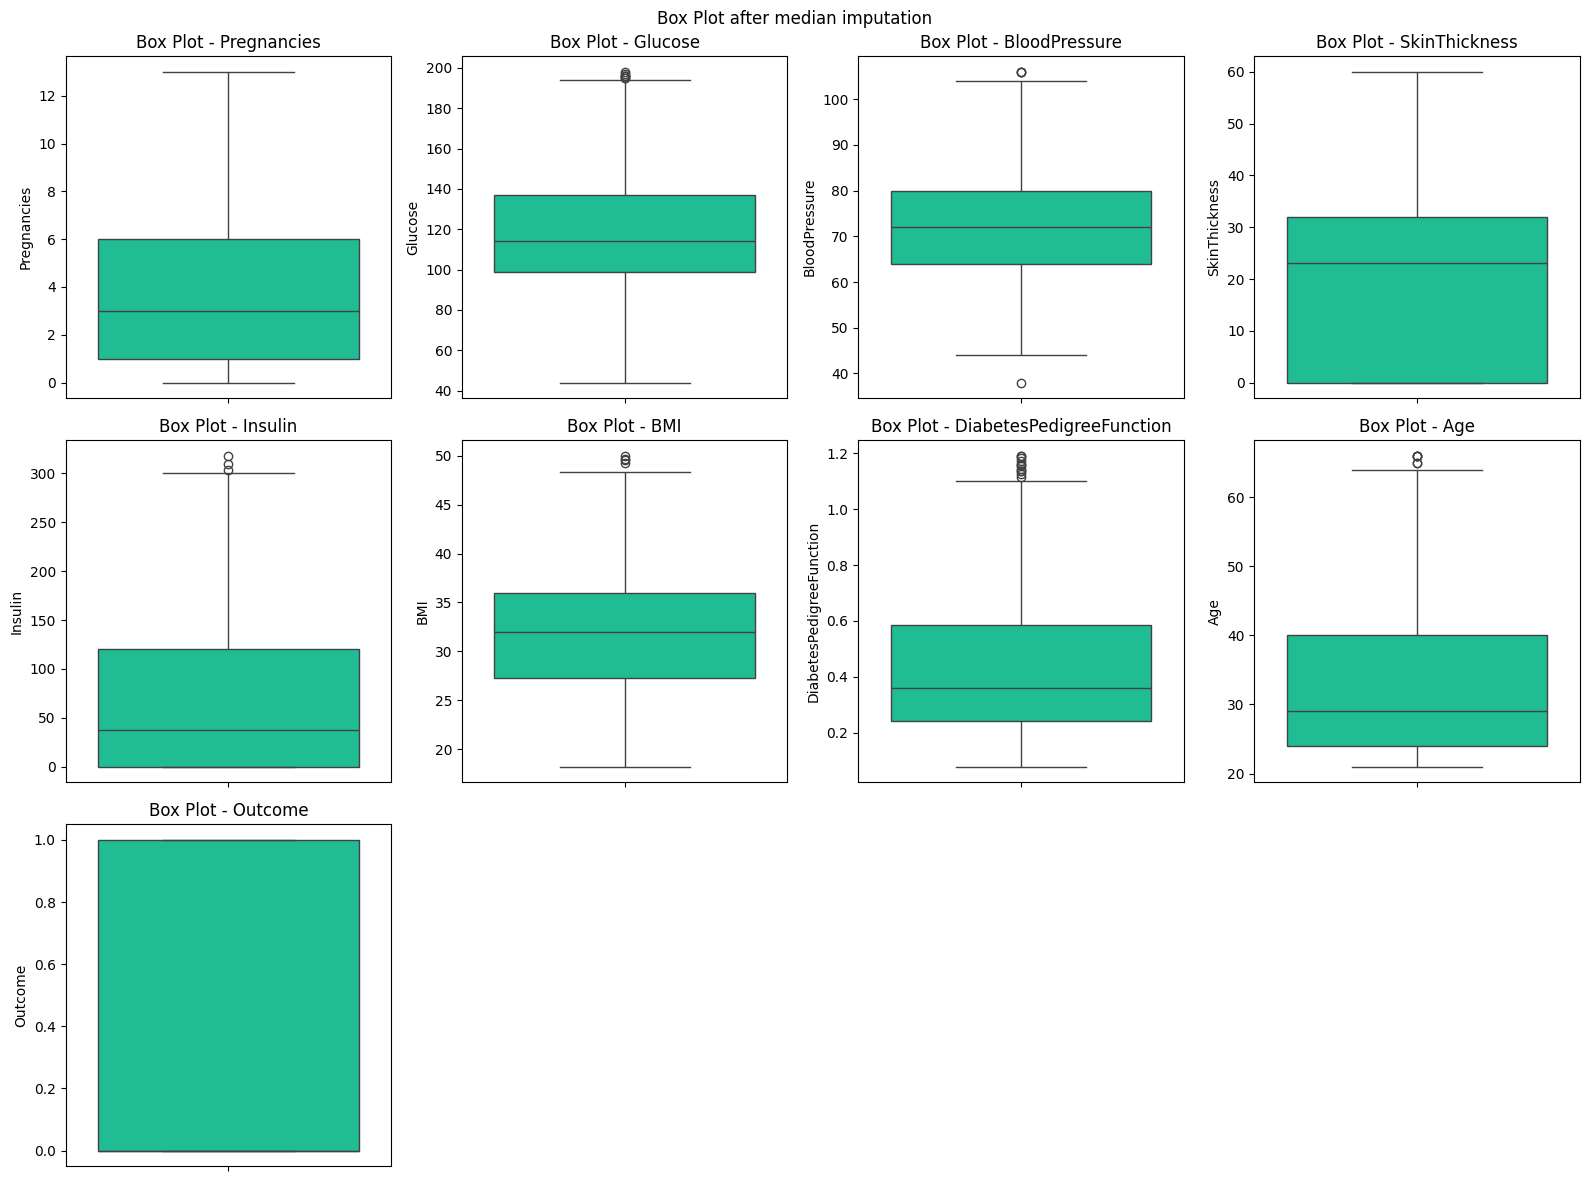

In [14]:
def box_plots_all_columns(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    plt.suptitle("Box Plot after median imputation")

    for i, column in enumerate(df.columns):
        row = i // 4
        col = i % 4
        sns.boxplot(df[column], ax=axes[row, col], color='#06D6A0')
        axes[row, col].set_title(f"Box Plot - {column}")

    for i in range(num_cols, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

box_plots_all_columns(df)

Based on the previous results of comparing the number of people with diabetes and non-diabetes, it can be seen that the number of data for people with diabetes is only 34.9% and non-diabetes is 65.1%. This indicates that the data is not balanced (imbalance data). So it is necessary to handle imbalanced data, because unbalanced data can result in bias in the model and accuracy results can be inaccurate.

There are two methods for dealing with imbalance data, namely oversampling and undersampling, depending on the case and dataset you have.

Oversampling: Used when we have a small dataset and want to sample more minority classes. Oversampling with SMOTE can help improve model accuracy because it does not lose data, but it can increase the risk of overfitting if not managed properly.

Undersampling: Used when we have a large dataset and want to reduce the number of majority class samples. Undersampling can help reduce training time and improve class balance, but it can reduce useful information if majority class samples are randomly removed.

In this case, we will apply the oversamling method because the dataset used is in the small category, so using this method can make the dataset balanced.

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Split data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Oversampling using SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)
counter_over = Counter(y_over)

print("Setelah oversampling:", counter_over)

Setelah oversampling: Counter({1: 439, 0: 439})


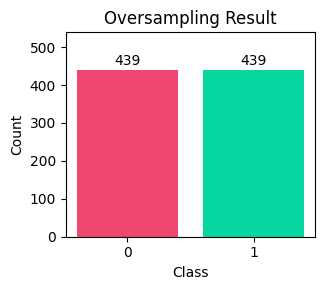

In [16]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
colors = ['#06D6A0', '#EF476F']  # Gunakan warna merah dan hijau
plt.bar(counter_over.keys(), counter_over.values(), color=colors)
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Oversampling Result')
plt.ylim([0, max(counter_over.values()) + 100])

for i, v in enumerate(counter_over.values()):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Imbalanced data has been successfully handled, the data is balanced and can be used for the model development stage.


## Data splitting

The next stage is dividing the dataset into train data and test data. Train data will be used in the model training process, and test data will be used to test or find out how well the model that has been created generalizes to new data that it has never seen.

After conducting several experiments, in this case the dataset will be divided into a 70:30 proportion, namely train data (70%) and test data (30%).

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

## Standardization

Before developing a machine learning model, a standardization process is first carried out. This stage is used to process the numerical features in the data so that it has a mean of 0 and a standard deviation of 1. One of the purposes of standardization is because many machine learning algorithms perform better or are stable when the numerical features are on the same scale. With standardization, these features are treated uniformly, which can improve model performance.

In [18]:
# standardization using StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
X_train_prepared = num_pipeline.fit_transform(X_train)
X_test_prepared = num_pipeline.transform(X_test)

## Modelling & Evaluate

In [19]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### Logistic Regression

In [20]:
logistic_regression__model = LogisticRegression(max_iter=1000)
logistic_regression__model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
print_score(logistic_regression__model, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_regression__model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 72.64%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.716981    0.736486  0.726384    0.726734      0.726766
recall       0.745098    0.707792  0.726384    0.726445      0.726384
f1-score     0.730769    0.721854  0.726384    0.726312      0.726297
support    306.000000  308.000000  0.726384  614.000000    614.000000
_______________________________________________
Confusion Matrix: 
 [[228  78]
 [ 90 218]]

Test Result:
Accuracy Score: 76.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.743056    0.783333  0.761364    0.763194      0.763042
recall       0.804511    0.717557  0.761364    0.761034      0.761364
f1-score     0.772563    0.749004  0.761364    0.760784      0.760873
support    133.000000  131.000000  0.761364  264.000000    264.

### K-Nearest Neighbors (KNN)

In [22]:
knn__model = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
knn__model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [23]:
print_score(knn__model, X_train, y_train, X_test, y_test, train=True)
print_score(knn__model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 79.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.871901    0.744624  0.794788    0.808262      0.808055
recall       0.689542    0.899351  0.794788    0.794447      0.794788
f1-score     0.770073    0.814706  0.794788    0.792389      0.792462
support    306.000000  308.000000  0.794788  614.000000    614.000000
_______________________________________________
Confusion Matrix: 
 [[211  95]
 [ 31 277]]

Test Result:
Accuracy Score: 73.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.785714    0.703947  0.738636    0.744831      0.745141
recall       0.661654    0.816794  0.738636    0.739224      0.738636
f1-score     0.718367    0.756184  0.738636    0.737276      0.737132
support    133.000000  131.000000  0.738636  264.000000    264.

### Decision Tree Classifier

In [24]:
decision_tree__model = DecisionTreeClassifier(random_state=42)
decision_tree__model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
print_score(decision_tree__model, X_train, y_train, X_test, y_test, train=True)
print_score(decision_tree__model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    306.0  308.0       1.0      614.0         614.0
_______________________________________________
Confusion Matrix: 
 [[306   0]
 [  0 308]]

Test Result:
Accuracy Score: 77.27%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.770370    0.775194  0.772727    0.772782      0.772764
recall       0.781955    0.763359  0.772727    0.772657      0.772727
f1-score     0.776119    0.769231  0.772727    0.772675      0.772701
support    133.000000  131.000000  0.772727  264.000000    264.000000
_______________________________________________

### Random Forest

In [26]:
random_forest__model = RandomForestClassifier(n_estimators=100)
random_forest__model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
print_score(random_forest__model, X_train, y_train, X_test, y_test, train=True)
print_score(random_forest__model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    306.0  308.0       1.0      614.0         614.0
_______________________________________________
Confusion Matrix: 
 [[306   0]
 [  0 308]]

Test Result:
Accuracy Score: 86.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.875969    0.851852  0.863636    0.863910      0.864002
recall       0.849624    0.877863  0.863636    0.863743      0.863636
f1-score     0.862595    0.864662  0.863636    0.863629      0.863621
support    133.000000  131.000000  0.863636  264.000000    264.000000
_______________________________________________

In [28]:
# Initialize models
models = {
    "Logistic Regression \t": LogisticRegression(max_iter=1000),
    "KNN \t\t\t": KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean'),
    "Decision Tree \t\t": DecisionTreeClassifier(random_state=42),
    "Random Forest \t\t": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate each model
results_train = {}
results_test = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    acc_score_train = accuracy_score(y_train, y_pred_train)
    results_train[name] = acc_score_train

    y_pred_test = model.predict(X_test)
    acc_score_test = accuracy_score(y_test, y_pred_test)
    results_test[name] = acc_score_test

# Print results
print("\n======================")
print("Train Accuracy Scores:")
print("======================")
for name, score in results_train.items():
    print(f"{name}: {score:.4f}")

print("\n======================")
print("Test Accuracy Scores:")
print("======================")
for name, score in results_test.items():
    print(f"{name}: {score:.4f}")


Train Accuracy Scores:
Logistic Regression 	: 0.7264
KNN 			: 0.7948
Decision Tree 		: 1.0000
Random Forest 		: 1.0000

Test Accuracy Scores:
Logistic Regression 	: 0.7614
KNN 			: 0.7386
Decision Tree 		: 0.7727
Random Forest 		: 0.8447


## Best model

Based on the results of model training, it can be seen that the best model is Random Forest Classification with Train Accuracy 100% and Test Accuracy 82%. With a classification report as follows:

In [29]:
print_score(random_forest__model, X_train, y_train, X_test, y_test, train=True)
print_score(random_forest__model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    306.0  308.0       1.0      614.0         614.0
_______________________________________________
Confusion Matrix: 
 [[306   0]
 [  0 308]]

Test Result:
Accuracy Score: 86.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.875969    0.851852  0.863636    0.863910      0.864002
recall       0.849624    0.877863  0.863636    0.863743      0.863636
f1-score     0.862595    0.864662  0.863636    0.863629      0.863621
support    133.000000  131.000000  0.863636  264.000000    264.000000
_______________________________________________

--- End of Code ---